In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,NaN,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,NaN,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	11
float64		column 2	5
float64		column 3	10
float64		column 4	10
float64		column 5	5
float64		column 6	16
float64		column 7	15
float64		column 8	10
float64		column 9	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,203.000000,209.000000,204.000000,204.000000,209.000000,198.000000,199.000000,204.000000,204.000000
mean,1.518191,13.405694,2.650343,1.432304,72.652871,0.501616,8.931256,0.160686,0.054167
std,0.002784,0.822897,1.464728,0.469226,0.775956,0.674135,1.437942,0.479083,0.095101
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516515,12.900000,1.845000,1.190000,72.280000,0.122500,8.255000,0.000000,0.000000
50%,1.517640,13.300000,3.475000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519070,13.810000,3.600000,1.622500,73.090000,0.610000,9.105000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

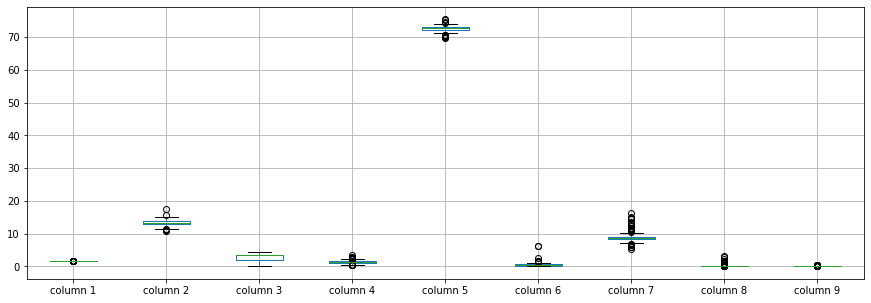

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518191
column 2    13.405694
column 3     2.650343
column 4     1.432304
column 5    72.652871
column 6     0.501616
column 7     8.931256
column 8     0.160686
column 9     0.054167
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.109518,-0.014138,-0.399157,-0.532735,-0.316758,0.778700,-0.112456,0.096064
column 2,-0.109518,1.000000,-0.283461,0.195255,-0.057599,-0.258935,-0.325775,0.286287,-0.199233
column 3,-0.014138,-0.283461,1.000000,-0.465947,-0.160330,-0.029251,-0.426033,-0.457202,0.112715
column 4,-0.399157,0.195255,-0.465947,1.000000,0.057665,0.167412,-0.211894,0.518708,-0.069211
column 5,-0.532735,-0.057599,-0.160330,0.057665,1.000000,-0.217873,-0.214311,-0.179009,-0.118797
column 6,-0.316758,-0.258935,-0.029251,0.167412,-0.217873,1.000000,-0.314809,0.005957,-0.010945
column 7,0.778700,-0.325775,-0.426033,-0.211894,-0.214311,-0.314809,1.000000,-0.103359,0.077657
column 8,-0.112456,0.286287,-0.457202,0.518708,-0.179009,0.005957,-0.103359,1.000000,-0.036425
column 9,0.096064,-0.199233,0.112715,-0.069211,-0.118797,-0.010945,0.077657,-0.036425,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+19,9+19+19,9+19+19+19,9+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19,9+19+19+19,9+19+19,9+19,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 99.37715148925781
Epoch: 1 , loss: 99.37364548903246
Epoch: 2 , loss: 99.34393310546875
Epoch: 3 , loss: 99.35881511981671
Epoch: 4 , loss: 99.56543320875902
Epoch: 5 , loss: 99.31585341233473
Epoch: 6 , loss: 99.28460165170523
Epoch: 7 , loss: 99.19809312086839
Epoch: 8 , loss: 99.25277357835036
Epoch: 9 , loss: 99.20362208439754
Epoch: 10 , loss: 99.20499361478366
Epoch: 11 , loss: 99.14624316875751
Epoch: 12 , loss: 99.22655310997597
Epoch: 13 , loss: 99.1692616389348
Epoch: 14 , loss: 99.16101367657001
Epoch: 15 , loss: 99.16106942983774
Epoch: 16 , loss: 99.15980118971605
Epoch: 17 , loss: 99.15836275540866
Epoch: 18 , loss: 99.2209730881911
Epoch: 19 , loss: 99.14232224684496
Epoch: 20 , loss: 99.23592200646034
Epoch: 21 , loss: 99.25412926307091
Epoch: 22 , loss: 99.22212923490085
Epoch: 23 , loss: 99.17610227144681
Epoch: 24 , loss: 99.26587794377254
Epoch: 25 , loss: 99.1815197284405
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,-3.595352,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
210,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
211,0.0,0.0,0.000000,0.0,-73.395452,0.000000,0.0,0.0,0.0
212,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(169.47531266586032, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.1554197729415378

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.490000,1.10,71.780000,0.060000,8.75,0.00,0.0
1,1.51761,13.89,3.600000,1.36,72.730000,0.480000,7.83,0.00,0.0
2,1.51618,13.53,3.550000,1.54,72.990000,0.390000,7.78,0.00,0.0
3,1.51766,13.21,3.690000,1.29,72.610000,0.570000,8.22,0.00,0.0
4,1.51742,13.27,0.024648,1.24,73.080000,0.550000,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.88,72.610000,0.080000,9.18,1.06,0.0
210,1.51685,14.92,0.000000,1.99,73.060000,0.000000,8.40,1.59,0.0
211,1.52065,14.36,0.000000,2.02,0.024548,0.000000,8.44,1.64,0.0
212,1.51651,14.38,0.000000,1.94,73.610000,0.000000,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NE_5(imp).xlsx", index=False, header=False)